# Nelder Mead method – 8 points

Implement Nelder-Mead method for the Mishra’s Bird function
$f(x; y) = sin(y)e^{(1-cos(x))^2}+ cos(x)e^{(1-sin(y))^2}+ (x - y)^2$
subjected to, $(x + 5)^2 + (y + 5)^2 < 25$

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
alpha = 1
beta = 0.5
gamma = 2
delta = 0.5

Populating the interactive namespace from numpy and matplotlib


## I should take initial points such that they satisy our constraint $(x + 5)^2 + (y + 5)^2 < 25$

In [2]:
def func(x,y):
    return np.sin(y)*np.exp(np.square(1-np.cos(x)))+np.cos(x)*np.exp(np.square(1-np.sin(y)))+np.square(x-y)

In [3]:
def ordering(a,b,c,d,e,f):
    if func(a,b)<=func(c,d)<=func(e,f):
        return np.array([a,b]), np.array([c,d]), np.array([e,f])
    if func(a,b)<=func(e,f)<=func(c,d):
        return np.array([a,b]),np.array([e,f]),np.array([c,d])
    else:
        return np.array([e,f]), np.array([a,b]),np.array([c,d])

In [4]:
def centroid(b,d):
    return (b+d)/2

In [5]:
def reflection(c, xh, alpha):
    return c + alpha*(c-xh)

In [6]:
def expansion(c, gamma, xr):
    return c + gamma*(xr-c)

In [7]:
def contraction(c, beta, xh):
    return c + beta*(xh-c)

In [8]:
def shrink(xl, delta, xj):
    return xl + delta * (xj-xl)

In [9]:
def nelder_mead(a, b, c, alpha=1, gamma=2, rho=0.5, sigma=0.5, tol=1e-6):
    xl, xs, xh = ordering(a[0], a[1], b[0], b[1], c[0], c[1])
    listt = []
    iterations = 0
    while True:
        xl, xs, xh = ordering(xl[0],xl[1], xs[0], xs[1], xh[0], xh[1])
        bval = func(xl[0], xl[1])
        mval = func(xs[0], xs[1])
        wval = func(xh[0], xh[1])
        iterations += 3
        
        if np.std([bval, mval, wval]) <= tol:    # terminating if the function values don't differ too much
            return bval, xl, np.array(listt), iterations
        c = (xl + xs)/2
        xr = reflection(c, xh, alpha)
        xrval = func(xr[0], xr[1])
        iterations += 1
        if bval <= xrval and xrval < mval:
            xh = xr
            listt.append([xh[0],xh[1]])
            listt.append([xs[0],xs[1]])
            listt.append([xl[0],xl[1]])
        elif bval > xrval:
            xe = expansion(c, gamma, xr)
            xeval = func(xe[0], xe[1])
            iterations += 1
            if xeval < xrval:
                xh = xe
            else:
                xh = xr
            listt.append([xh[0],xh[1]])
            listt.append([xs[0],xs[1]])
            listt.append([xl[0],xl[1]])
        else:
            xc = contraction(c, beta, xh)
            xcval = func(xc[0],xc[1])
            iterations += 1
            if xcval < wval:
                xh = xc
            else:
                xs = shrink(xl, delta, xs)
                xh = shrink(xl, delta, xh)
            listt.append([xh[0],xh[1]])
            listt.append([xs[0],xs[1]])
            listt.append([xl[0],xl[1]])

In [10]:
val, x, listt, _ = nelder_mead([-2, -2], [-3, -3], [-1, -3], tol=1e-6)
val, x

(-106.76453629227875, array([-3.13023709, -1.58219896]))

### Optimal point and solution

In [11]:
print("x=",x[0])
print("y=",x[1])
print("Optimal solution =",val)

x= -3.1302370897141607
y= -1.582198960210551
Optimal solution = -106.76453629227875


## 1. To illustrate the behavior of the methods plot simplex (triangle) for every iteration.

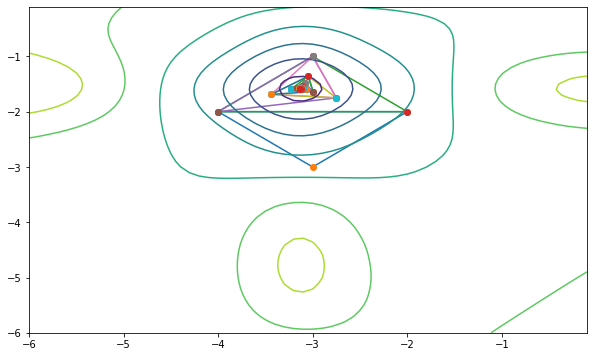

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(-6, 0.0, 0.1)
y = np.arange(-6, 0.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.sin(Y)*np.exp(np.square(1-np.cos(X)))+np.cos(X)*np.exp(np.square(1-np.sin(Y)))+np.square(X-Y)
plt.contour(X,Y,Z)
for i in range(0, listt.shape[0],3):
    triang = mtri.Triangulation(listt[i:i+3,0], listt[i:i+3,1])
    plt.triplot(triang, marker="o")

## 2. Demonstrate that the algorithm may converge to different points depending on the starting point. Report explicitly two distinct starting points $x^0$ and the corresponding $x$*

In [13]:
val, x, _ , _  = nelder_mead([-4, -8], [-5, -9], [-2.5, -9], tol=1e-6)

In [14]:
print("x=",x[0])
print("y=",x[1])
print("Optimal solution =",val)

x= -3.1758020126179822
y= -7.819954022252219
Optimal solution = -87.31088042717471


## Well, how you see, it converged to different minimum.

# 4 Coordinate descend – 6 points

Implement coordinate descend for $x^0$ and f from Task 3. Compare the number of function evaluations
(Oracle calls) for Nelder Mead algorithm and Coordinate descend. Report parameters of the
algorithm. Provide the link to code repository. Make a conclusion.

In [15]:
import numpy as np
%pylab inline
alpha = 0.007
x0=np.array([-1,-5], dtype = float)
x=np.array([0, 0], dtype = float)
listtx=[]
listty=[]

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
def func(x,y):
    return np.sin(y)*np.exp(np.square(1-np.cos(x)))+np.cos(x)*np.exp(np.square(1-np.sin(y)))+np.square(x-y)

In [17]:
def derivbyx(x,y):
    return 2 * (x - y) - sin(x) * exp((1 - sin(y)) ** 2) + 2 * sin(x) * exp((1 - cos(x)) ** 2) * (1 - cos(x)) * sin(y)

In [18]:
def derivbyy(x, y):
    return -2 * (x - y) + exp((1 - cos(x)) ** 2) * cos(y) - 2 * cos(x) * exp((1 - sin(y)) ** 2) * (1 - sin(y)) * cos(y)

In [19]:
def coordinate_descent(x, y, alpha=alpha, tol=1e-6):
    prev = 100
    val = func(x, y)
    x_cur = x
    y_cur = y
    x_history = []
    y_history = []
    iters = 0
    while np.abs(val - prev) > tol:
        prev = val
        x_history.append(x_cur)
        y_history.append(y_cur)
        x_cur -= alpha * derivbyx(x_cur, y_cur)
        x_history.append(x_cur)
        y_history.append(y_cur)
        y_cur -= alpha * derivbyy(x_cur, y_cur)
        iters += 2
        val = func(x_cur,y_cur)
        iters += 1

    return val, x_cur, y_cur, iters, np.array(x_history), np.array(y_history)

In [20]:
val, x, y, _, listx, listy = coordinate_descent(-3,-3)

### Optimal point and solution

In [21]:
print("x=",x)
print("y=",y)
print("Optimal solution =",val)

x= -3.1300675358461487
y= -1.5822104772287655
Optimal solution = -106.76453166976239


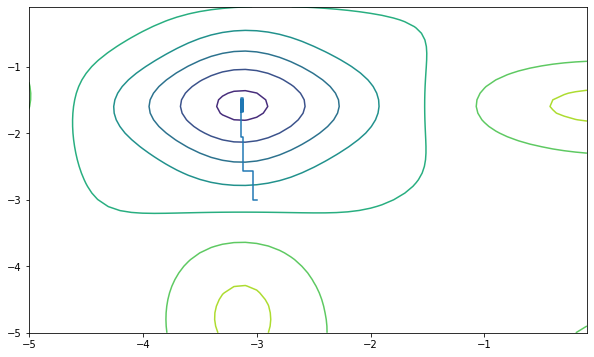

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(-5, 0.0, 0.1)
y = np.arange(-5.0, 0.0, 0.1)
X, Y = np.meshgrid(x, y)


Z = np.sin(Y)*np.exp(np.square(1-np.cos(X)))+np.cos(X)*np.exp(np.square(1-np.sin(Y)))+np.square(X-Y)


plt.contour(X,Y,Z)
plt.plot(listx, listy)

## This method also works well